In [132]:
%store -r X_train_scaled
%store -r X_test_scaled
%store -r y_train
%store -r y_test
%store -r column_names
%store -r preds_linear
%store -r preds_lasso
%store -r preds_ridge
from joblib import load
models=load('all_models_filename.joblib')
lasso_cv=models['model1']
ridge_cv=models['model2']

# Modeling

The objective of this project is to build models to predict the price of car as a function of features that define a car and and to study how the variation of the different features affect the price of the car

The purpose of this notebook is to use additional algorithms to model the relationship between features and car price then comparison their performance.

Table of Contents

[e.1 Random Forests](#e.1)

[e.2 XGBoost](#e.2)

[e.3 LightGBM](#e.3)

[e.4 Residual Histogram](#e.4)

[e.5 MAPE](#e.5)

[e.6 SHAP](#e.6)

In [133]:
# Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

<a id="e.1"></a>
## e.1 Random Forests

In [134]:
#Random Forests

from sklearn.ensemble import RandomForestRegressor

    
# Create the models
random_forest_model = RandomForestRegressor(random_state=42)

# Train the models
random_forest_model.fit(X_train_scaled, y_train)

# Assuming 'random_forest_model' is your trained RandomForest model
n_estimators = random_forest_model.n_estimators
max_depth = random_forest_model.max_depth

# Make predictions using the test set
preds_random_forest = random_forest_model.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, preds_random_forest))
print("RMSE: %f" % (rmse))
print("Number of Estimators (n_estimators):", n_estimators)
print("Maximum Depth of Trees (max_depth):", max_depth)


RMSE: 2088.934778
Number of Estimators (n_estimators): 100
Maximum Depth of Trees (max_depth): None


In [158]:
#Apply hyper parameter tuning on random forests model

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [98, 100, 102, 110],  # Number of trees in the forest
    'max_depth': [None,9, 10, 11, 30],  # Maximum depth of the tree
    # Add more parameters here if you wish
}

# Create the RandomForestRegressor model
random_forest_model = RandomForestRegressor(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
random_forest_params= best_params
random_forest_best_model=best_model
print("Best Parameters:", best_params)

# Make predictions using the best model
preds_random_forest = best_model.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, preds_random_forest))
print("RMSE: %f" % (rmse))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'max_depth': 10, 'n_estimators': 98}
RMSE: 2086.798123


<a id="e.2"></a>
## e.2 XGBoost

In [136]:
#XGBoost

import xgboost as xgb

# Initialize XGBoost model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# Fit the model
xg_reg.fit(X_train_scaled, y_train)

# Predict
preds_XGBoost = xg_reg.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, preds_XGBoost))
print("RMSE: %f" % (rmse))

RMSE: 6952.315287


In [144]:
# Apply hyper parameters tuning on XGboost model
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the parameter grid
param_grid = {
    'colsample_bytree': [0.4, 0.3, 0.5],  # Fraction of features used per tree
    'learning_rate': [0.11,0.1, 0.09],   # Step size shrinkage used in update
    'max_depth': [5,3,4],               # Maximum depth of a tree
    'alpha': [5, 4, 6],                 # L1 regularization term on weights
    'n_estimators': [120, 115,117]         # Number of trees
}

# Initialize XGBoost model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')

# Create GridSearchCV
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Make predictions using the best model
preds_XGBoost = best_model.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, preds_XGBoost))
print("RMSE: %f" % (rmse))


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'alpha': 4, 'colsample_bytree': 0.4, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 117}
RMSE: 2115.571009
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.11, max_depth=5, n_estimators=120; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.11, max_depth=3, n_estimators=120; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.11, max_depth=3, n_estimators=117; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.11, max_depth=4, n_estimators=117; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.1, max_depth=5, n_estimators=117; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.1, max_depth=3, n_estimators=115; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=115; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4

[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.11, max_depth=5, n_estimators=115; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.11, max_depth=5, n_estimators=117; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.11, max_depth=4, n_estimators=120; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.11, max_depth=4, n_estimators=117; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.1, max_depth=5, n_estimators=117; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.1, max_depth=3, n_estimators=117; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.09, max_depth=5, n_estimators=117; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.09, max_depth=5, n_estimators=117; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.09, max_depth=3, n_estimators=117; total time=   0.0s
[CV] END alp

[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.11, max_depth=5, n_estimators=115; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.11, max_depth=3, n_estimators=120; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.11, max_depth=4, n_estimators=115; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.1, max_depth=5, n_estimators=120; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.1, max_depth=3, n_estimators=115; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=115; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=117; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.09, max_depth=3, n_estimators=115; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.09, max_depth=3, n_estimators=117; total time=   0.0s
[CV] END alpha

[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.11, max_depth=5, n_estimators=115; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.11, max_depth=3, n_estimators=115; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.11, max_depth=4, n_estimators=115; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.1, max_depth=5, n_estimators=115; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.1, max_depth=3, n_estimators=120; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=120; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.09, max_depth=5, n_estimators=120; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.09, max_depth=5, n_estimators=115; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.4, learning_rate=0.09, max_depth=4, n_estimators=115; total time=   0.0s
[CV] END alph

<a id="e.3"></a>
## e.3 LightGBM

In [138]:
#LighGBM

import lightgbm as lgb

# Initialize LGBM model
lgb_reg = lgb.LGBMRegressor(objective='regression', learning_rate=0.1, n_estimators=100)

# Fit the model
lgb_reg.fit(X_train_scaled, y_train, eval_set=[(X_test_scaled, y_test)], eval_metric='l1', early_stopping_rounds=5)

# Predict
preds_LGBM = lgb_reg.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, preds_LGBM))
print("RMSE: %f" % (rmse))

[1]	valid_0's l1: 5571.27	valid_0's l2: 5.84483e+07
[2]	valid_0's l1: 5162.77	valid_0's l2: 5.08989e+07
[3]	valid_0's l1: 4838.76	valid_0's l2: 4.55141e+07
[4]	valid_0's l1: 4575.29	valid_0's l2: 4.11021e+07
[5]	valid_0's l1: 4362	valid_0's l2: 3.7754e+07
[6]	valid_0's l1: 4148.05	valid_0's l2: 3.47738e+07
[7]	valid_0's l1: 3952.7	valid_0's l2: 3.24457e+07
[8]	valid_0's l1: 3801.27	valid_0's l2: 3.06322e+07
[9]	valid_0's l1: 3636.69	valid_0's l2: 2.88523e+07
[10]	valid_0's l1: 3471.53	valid_0's l2: 2.69673e+07
[11]	valid_0's l1: 3327.51	valid_0's l2: 2.53202e+07
[12]	valid_0's l1: 3210.69	valid_0's l2: 2.3931e+07
[13]	valid_0's l1: 3072.03	valid_0's l2: 2.24798e+07
[14]	valid_0's l1: 3005.41	valid_0's l2: 2.18244e+07
[15]	valid_0's l1: 2924.05	valid_0's l2: 2.09503e+07
[16]	valid_0's l1: 2838.86	valid_0's l2: 2.00358e+07
[17]	valid_0's l1: 2782.69	valid_0's l2: 1.93897e+07
[18]	valid_0's l1: 2715.08	valid_0's l2: 1.83614e+07
[19]	valid_0's l1: 2644.15	valid_0's l2: 1.76228e+07
[20]	val

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


In [139]:
# Apply hyper parameter tuning on LGBM model
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the parameter grid
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'num_leaves': [31, 50, 100],  # Number of leaves in full tree
    'max_depth': [5, 10, 20],
    # You can add more hyperparameters here
}

# Initialize LGBM model
lgb_reg = lgb.LGBMRegressor(objective='regression')

# Create GridSearchCV
grid_search = GridSearchCV(estimator=lgb_reg, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train, eval_set=[(X_test_scaled, y_test)], 
                eval_metric='l1', early_stopping_rounds=5)

# Best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Make predictions using the best model
preds_LGBM = best_model.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, preds_LGBM))
print("RMSE: %f" % (rmse))


Fitting 3 folds for each of 81 candidates, totalling 243 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a futu

[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.3s
[CV] END .....................max_depth=10, n_estimators=200; total time=   0.2s
[CV] END .....................max_depth=20, n_estimators=200; total time=   0.2s
[CV] END ......................max_depth=30, n_estimators=50; total time=   0.1s
[CV] END .....................max_depth=30, n_estimators=200; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.1s
[CV] END ...................max_depth=None, n_estimators=300; total time=   0.4s
[CV] END .....................max_depth=20, n_estimators=110; total time=   0.1s
[CV] END .....................max_depth=20, n_estimators=110; total time=   0.1s
[CV] END .....................max_depth=30, n_estimators=110; total time=   0.1s
[CV] END .....................max_depth=30, n_estimators=300; total time=   0.2s
[CV] END ...................

[62]	valid_0's l1: 3024.9	valid_0's l2: 2.04144e+07
[63]	valid_0's l1: 3022.44	valid_0's l2: 2.03347e+07
[64]	valid_0's l1: 3008.93	valid_0's l2: 2.01885e+07
[65]	valid_0's l1: 3006.43	valid_0's l2: 2.01123e+07
[66]	valid_0's l1: 2992.97	valid_0's l2: 1.99709e+07
[67]	valid_0's l1: 2991.02	valid_0's l2: 1.9898e+07
[68]	valid_0's l1: 2980.82	valid_0's l2: 1.97625e+07
[69]	valid_0's l1: 2980.74	valid_0's l2: 1.96927e+07
[70]	valid_0's l1: 2970.52	valid_0's l2: 1.95604e+07
[71]	valid_0's l1: 2970.38	valid_0's l2: 1.94935e+07
[72]	valid_0's l1: 2958.93	valid_0's l2: 1.93662e+07
[73]	valid_0's l1: 2958.76	valid_0's l2: 1.93023e+07
[74]	valid_0's l1: 2948.56	valid_0's l2: 1.91784e+07
[75]	valid_0's l1: 2952.96	valid_0's l2: 1.9164e+07
[76]	valid_0's l1: 2948.64	valid_0's l2: 1.9026e+07
[77]	valid_0's l1: 2938.23	valid_0's l2: 1.89076e+07
[78]	valid_0's l1: 2937.73	valid_0's l2: 1.88492e+07
[79]	valid_0's l1: 2927.38	valid_0's l2: 1.87333e+07
[80]	valid_0's l1: 2926.88	valid_0's l2: 1.86774e+

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a futu

In [140]:
rmse

3434.156709878598

[15]	valid_0's l1: 3405.52	valid_0's l2: 3.08972e+07
[16]	valid_0's l1: 3361.1	valid_0's l2: 3.02052e+07
[17]	valid_0's l1: 3333.56	valid_0's l2: 2.98421e+07
[18]	valid_0's l1: 3303.22	valid_0's l2: 2.9293e+07
[19]	valid_0's l1: 3276.97	valid_0's l2: 2.89702e+07
[20]	valid_0's l1: 3254.35	valid_0's l2: 2.85217e+07
[21]	valid_0's l1: 3230.78	valid_0's l2: 2.81057e+07
[22]	valid_0's l1: 3206.28	valid_0's l2: 2.77996e+07
[23]	valid_0's l1: 3194.01	valid_0's l2: 2.7698e+07
[24]	valid_0's l1: 3182.59	valid_0's l2: 2.73947e+07
[25]	valid_0's l1: 3165.2	valid_0's l2: 2.70563e+07
[26]	valid_0's l1: 3146.67	valid_0's l2: 2.68029e+07
[27]	valid_0's l1: 3136.06	valid_0's l2: 2.66918e+07
[28]	valid_0's l1: 3126.52	valid_0's l2: 2.64104e+07
[29]	valid_0's l1: 3095.06	valid_0's l2: 2.59672e+07
[30]	valid_0's l1: 3087.77	valid_0's l2: 2.5863e+07
[31]	valid_0's l1: 3063.2	valid_0's l2: 2.57121e+07
[32]	valid_0's l1: 3055.65	valid_0's l2: 2.54684e+07
[33]	valid_0's l1: 3048.47	valid_0's l2: 2.52373e+07

[34]	valid_0's l1: 3043.53	valid_0's l2: 2.52661e+07
[35]	valid_0's l1: 3040.12	valid_0's l2: 2.51779e+07
[36]	valid_0's l1: 3032.97	valid_0's l2: 2.49895e+07
[37]	valid_0's l1: 3031.23	valid_0's l2: 2.48008e+07
[38]	valid_0's l1: 3027.57	valid_0's l2: 2.47091e+07
[39]	valid_0's l1: 3000.72	valid_0's l2: 2.43569e+07
[40]	valid_0's l1: 2994.92	valid_0's l2: 2.4393e+07
[41]	valid_0's l1: 2990.35	valid_0's l2: 2.42334e+07
[42]	valid_0's l1: 3003.85	valid_0's l2: 2.44124e+07
[43]	valid_0's l1: 3003.34	valid_0's l2: 2.42337e+07
[44]	valid_0's l1: 2975.27	valid_0's l2: 2.3917e+07
[45]	valid_0's l1: 2966.36	valid_0's l2: 2.39017e+07
[46]	valid_0's l1: 2963.17	valid_0's l2: 2.37503e+07
[47]	valid_0's l1: 2940.85	valid_0's l2: 2.34732e+07
[48]	valid_0's l1: 2954.55	valid_0's l2: 2.36339e+07
[49]	valid_0's l1: 2947.26	valid_0's l2: 2.35139e+07
[50]	valid_0's l1: 2930.9	valid_0's l2: 2.3526e+07
[51]	valid_0's l1: 2933.37	valid_0's l2: 2.33575e+07
[52]	valid_0's l1: 2944.97	valid_0's l2: 2.35087e+

[33]	valid_0's l1: 3048.47	valid_0's l2: 2.52373e+07
[34]	valid_0's l1: 3043.53	valid_0's l2: 2.52661e+07
[35]	valid_0's l1: 3040.12	valid_0's l2: 2.51779e+07
[36]	valid_0's l1: 3032.97	valid_0's l2: 2.49895e+07
[37]	valid_0's l1: 3031.23	valid_0's l2: 2.48008e+07
[38]	valid_0's l1: 3027.57	valid_0's l2: 2.47091e+07
[39]	valid_0's l1: 3000.72	valid_0's l2: 2.43569e+07
[40]	valid_0's l1: 2994.92	valid_0's l2: 2.4393e+07
[41]	valid_0's l1: 2990.35	valid_0's l2: 2.42334e+07
[42]	valid_0's l1: 3003.85	valid_0's l2: 2.44124e+07
[43]	valid_0's l1: 3003.34	valid_0's l2: 2.42337e+07
[44]	valid_0's l1: 2975.27	valid_0's l2: 2.3917e+07
[45]	valid_0's l1: 2966.36	valid_0's l2: 2.39017e+07
[46]	valid_0's l1: 2963.17	valid_0's l2: 2.37503e+07
[47]	valid_0's l1: 2940.85	valid_0's l2: 2.34732e+07
[48]	valid_0's l1: 2954.55	valid_0's l2: 2.36339e+07
[49]	valid_0's l1: 2947.26	valid_0's l2: 2.35139e+07
[50]	valid_0's l1: 2930.9	valid_0's l2: 2.3526e+07
[51]	valid_0's l1: 2933.37	valid_0's l2: 2.33575e+

[40]	valid_0's l1: 2889.25	valid_0's l2: 1.81691e+07
[41]	valid_0's l1: 2867.88	valid_0's l2: 1.79388e+07
[42]	valid_0's l1: 2866.8	valid_0's l2: 1.78344e+07
[43]	valid_0's l1: 2845.82	valid_0's l2: 1.76199e+07
[44]	valid_0's l1: 2844.74	valid_0's l2: 1.75242e+07
[45]	valid_0's l1: 2824.16	valid_0's l2: 1.73273e+07
[46]	valid_0's l1: 2831.75	valid_0's l2: 1.73312e+07
[47]	valid_0's l1: 2845.99	valid_0's l2: 1.72348e+07
[48]	valid_0's l1: 2822.71	valid_0's l2: 1.70364e+07
[49]	valid_0's l1: 2823.53	valid_0's l2: 1.68081e+07
[50]	valid_0's l1: 2791.44	valid_0's l2: 1.64839e+07
[51]	valid_0's l1: 2771.94	valid_0's l2: 1.63249e+07
[52]	valid_0's l1: 2770.81	valid_0's l2: 1.62506e+07
[53]	valid_0's l1: 2752.14	valid_0's l2: 1.60996e+07
[54]	valid_0's l1: 2763.7	valid_0's l2: 1.6127e+07
[55]	valid_0's l1: 2776.95	valid_0's l2: 1.60612e+07
[56]	valid_0's l1: 2781.3	valid_0's l2: 1.59177e+07
[57]	valid_0's l1: 2760.53	valid_0's l2: 1.57715e+07
[58]	valid_0's l1: 2774.76	valid_0's l2: 1.5806e+0

[71]	valid_0's l1: 2807.24	valid_0's l2: 2.14279e+07
[72]	valid_0's l1: 2797.06	valid_0's l2: 2.14449e+07
[73]	valid_0's l1: 2794.83	valid_0's l2: 2.13639e+07
[74]	valid_0's l1: 2806.68	valid_0's l2: 2.12938e+07
[75]	valid_0's l1: 2795.48	valid_0's l2: 2.1317e+07
[76]	valid_0's l1: 2797.18	valid_0's l2: 2.1247e+07
[77]	valid_0's l1: 2776.6	valid_0's l2: 2.10924e+07
[78]	valid_0's l1: 2782.14	valid_0's l2: 2.12073e+07
[79]	valid_0's l1: 2784.86	valid_0's l2: 2.11437e+07
[80]	valid_0's l1: 2774.27	valid_0's l2: 2.11681e+07
[81]	valid_0's l1: 2762.75	valid_0's l2: 2.1001e+07
[82]	valid_0's l1: 2766.08	valid_0's l2: 2.09428e+07
[83]	valid_0's l1: 2751.08	valid_0's l2: 2.09596e+07
[84]	valid_0's l1: 2751.95	valid_0's l2: 2.08996e+07
[85]	valid_0's l1: 2741.29	valid_0's l2: 2.0925e+07
[86]	valid_0's l1: 2744.79	valid_0's l2: 2.07852e+07
[87]	valid_0's l1: 2740.42	valid_0's l2: 2.07168e+07
[88]	valid_0's l1: 2738.9	valid_0's l2: 2.07627e+07
[89]	valid_0's l1: 2739.58	valid_0's l2: 2.08614e+07

<a id="e.4"></a>
## e.4 Residual Histogram

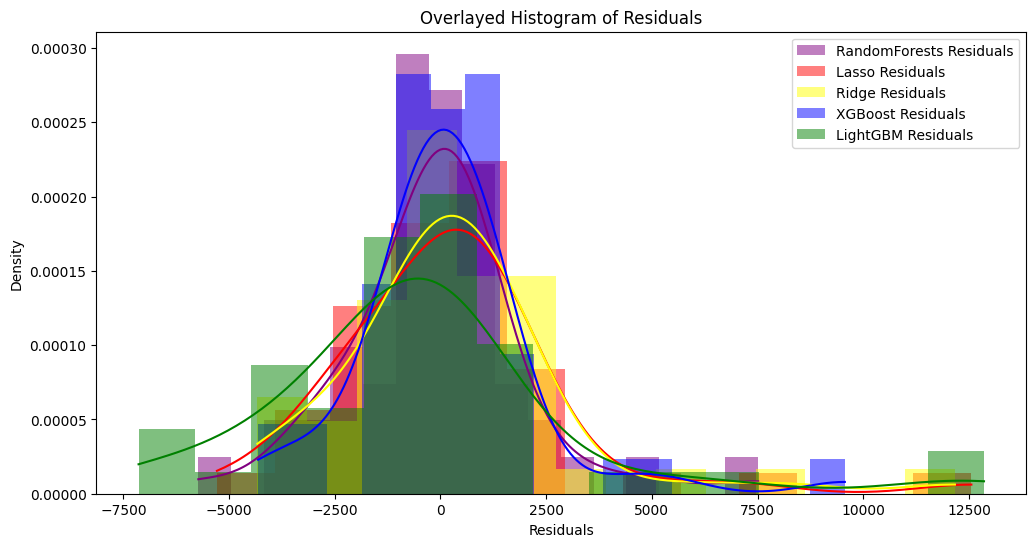

In [142]:
import seaborn as sns

# Calculate residuals
#residuals_randomforests = y_test - random_forest_model.predict(X_test_scaled)
# residuals_lasso = y_test - lasso_cv.predict(X_test_scaled)
# residuals_ridge = y_test - ridge_cv.predict(X_test_scaled)
# residuals_xgb = y_test - xg_reg.predict(X_test_scaled)  # from XGBoost
# residuals_lgbm = y_test - lgb_reg.predict(X_test_scaled)  # from LightGBM

residuals_randomforests = y_test - preds_random_forest
residuals_lasso = y_test - preds_lasso
residuals_ridge = y_test - preds_ridge
residuals_xgb = y_test - preds_XGBoost
residuals_lgm = y_test - preds_LGBM




# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot histogram of residuals for each model
sns.histplot(residuals_randomforests, color="purple", label="RandomForests Residuals", kde=True, stat="density", linewidth=0)
sns.histplot(residuals_lasso, color="red", label="Lasso Residuals", kde=True, stat="density", linewidth=0)
sns.histplot(residuals_ridge, color="yellow", label="Ridge Residuals", kde=True, stat="density", linewidth=0)
sns.histplot(residuals_xgb, color="blue", label="XGBoost Residuals", kde=True, stat="density", linewidth=0)
sns.histplot(residuals_lgbm, color="green", label="LightGBM Residuals", kde=True, stat="density", linewidth=0)

# Plot formatting
plt.title('Overlayed Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()

plt.show()

The RandomForests model histogram shows the smallest spread of residuals and tallest peak. It also centers around zero. The XGBoost model histgram shows the wider spread of residuals and it does not center around zero. The Lassso and Ridge models show similar performance. Therefore, Randomforests model is the best choice. 

<a id="e.5"></a>
## e.5 MAPE

In [143]:
from sklearn.metrics import mean_absolute_percentage_error
# Calculate MAPE
mape_linear = mean_absolute_percentage_error(y_test,preds_linear)
mape_random_forest = mean_absolute_percentage_error(y_test,preds_random_forest)
mape_XGBoost = mean_absolute_percentage_error(y_test,preds_XGBoost)
mape_LGBM = mean_absolute_percentage_error(y_test,preds_LGBM)
mape_lasso = mean_absolute_percentage_error(y_test, preds_lasso)
mape_ridge = mean_absolute_percentage_error(y_test, preds_ridge)
# Print the MAPE for both models
print("MAPE (Linear): {:.2f}%".format(mape_linear))
print("MAPE (Lasso): {:.2f}%".format(mape_lasso))
print("MAPE (Ridge): {:.2f}%".format(mape_ridge))
print("MAPE (Random Forests): {:.2f}%".format(mape_random_forest))
print("MAPE (XGBoost): {:.2f}%".format(mape_XGBoost))
print("MAPE (LGBM): {:.2f}%".format(mape_LGBM))

MAPE (Linear): 126994515015.95%
MAPE (Lasso): 0.14%
MAPE (Ridge): 0.13%
MAPE (Random Forests): 0.11%
MAPE (XGBoost): 0.10%
MAPE (LGBM): 0.17%


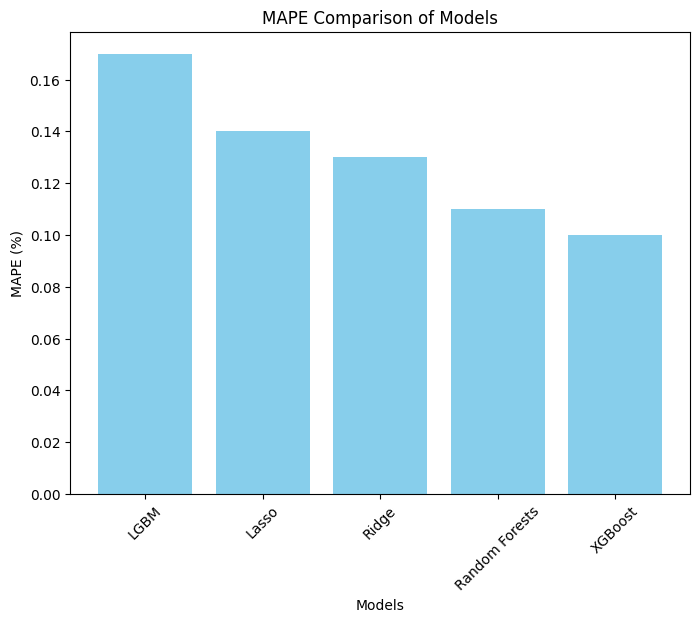

In [146]:
import matplotlib.pyplot as plt

# Example MAPE values for two models (replace these with your actual MAPE values)
mape_values = {
    "Lasso": 0.14, 
    "Ridge":0.13,
    "Random Forests":0.11,
    "XGBoost":0.10,
    "LGBM":0.17
    # Add any additional models here
}

# Sorting the MAPE values in descending order
sorted_mape_values = dict(sorted(mape_values.items(), key=lambda item: item[1], reverse=True))

# Creating a bar chart
plt.figure(figsize=(8, 6))
plt.bar(sorted_mape_values.keys(), sorted_mape_values.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('MAPE (%)')
plt.title('MAPE Comparison of Models')
plt.xticks(rotation=45)
plt.show()


<a id="e.6"></a>
## e.6 SHAP

In [150]:
# Concatenate X_train_scaled and X_test_scaled along rows
X_combined = np.concatenate([X_train_scaled, X_test_scaled], axis=0)

# Concatenate y_train and y_test similarly if they are numpy arrays
y_combined = np.concatenate([y_train, y_test], axis=0)


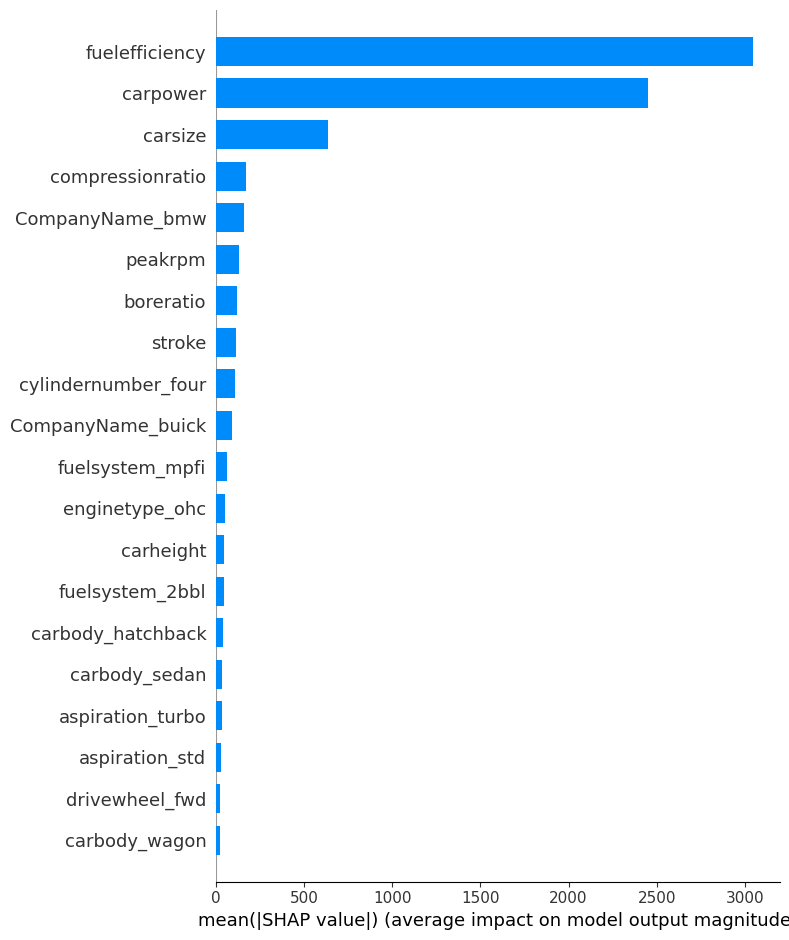

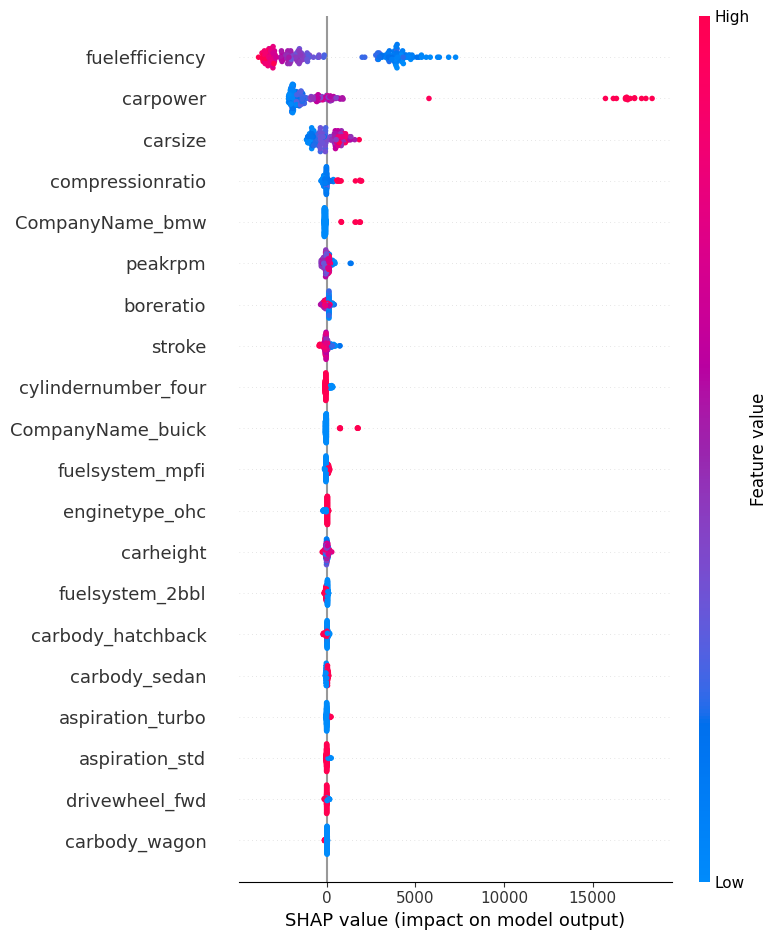

In [162]:
#SHAP

import shap

%matplotlib inline

# Concatenate X_train_scaled and X_test_scaled along rows
X_combined = np.concatenate([X_train_scaled, X_test_scaled], axis=0)

# Concatenate y_train and y_test similarly if they are numpy arrays
y_combined = np.concatenate([y_train, y_test], axis=0)

best_model = RandomForestRegressor(**random_forest_params, random_state=42)
best_model.fit(X_combined, y_combined)  # Retrain on the entire dataset
# Convert X_test_scaled to DataFrame with correct column names
# X_test_scaled = pd.DataFrame(X_combined, columns=column_names)
X_scaled = pd.DataFrame(X_combined, columns=column_names)


# Initialize SHAP explainer
explainer = shap.Explainer(random_forest_best_model, X_scaled)


# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_scaled)


# Visualize the SHAP summary plot
shap.summary_plot(shap_values, X_scaled
                  , plot_type="bar")


# Visualize detailed SHAP summary plot
shap.summary_plot(shap_values, X_scaled)


From the SHAP summary plot, fuelefficiency, carpower, and carsize are the top three features that impact car price. 

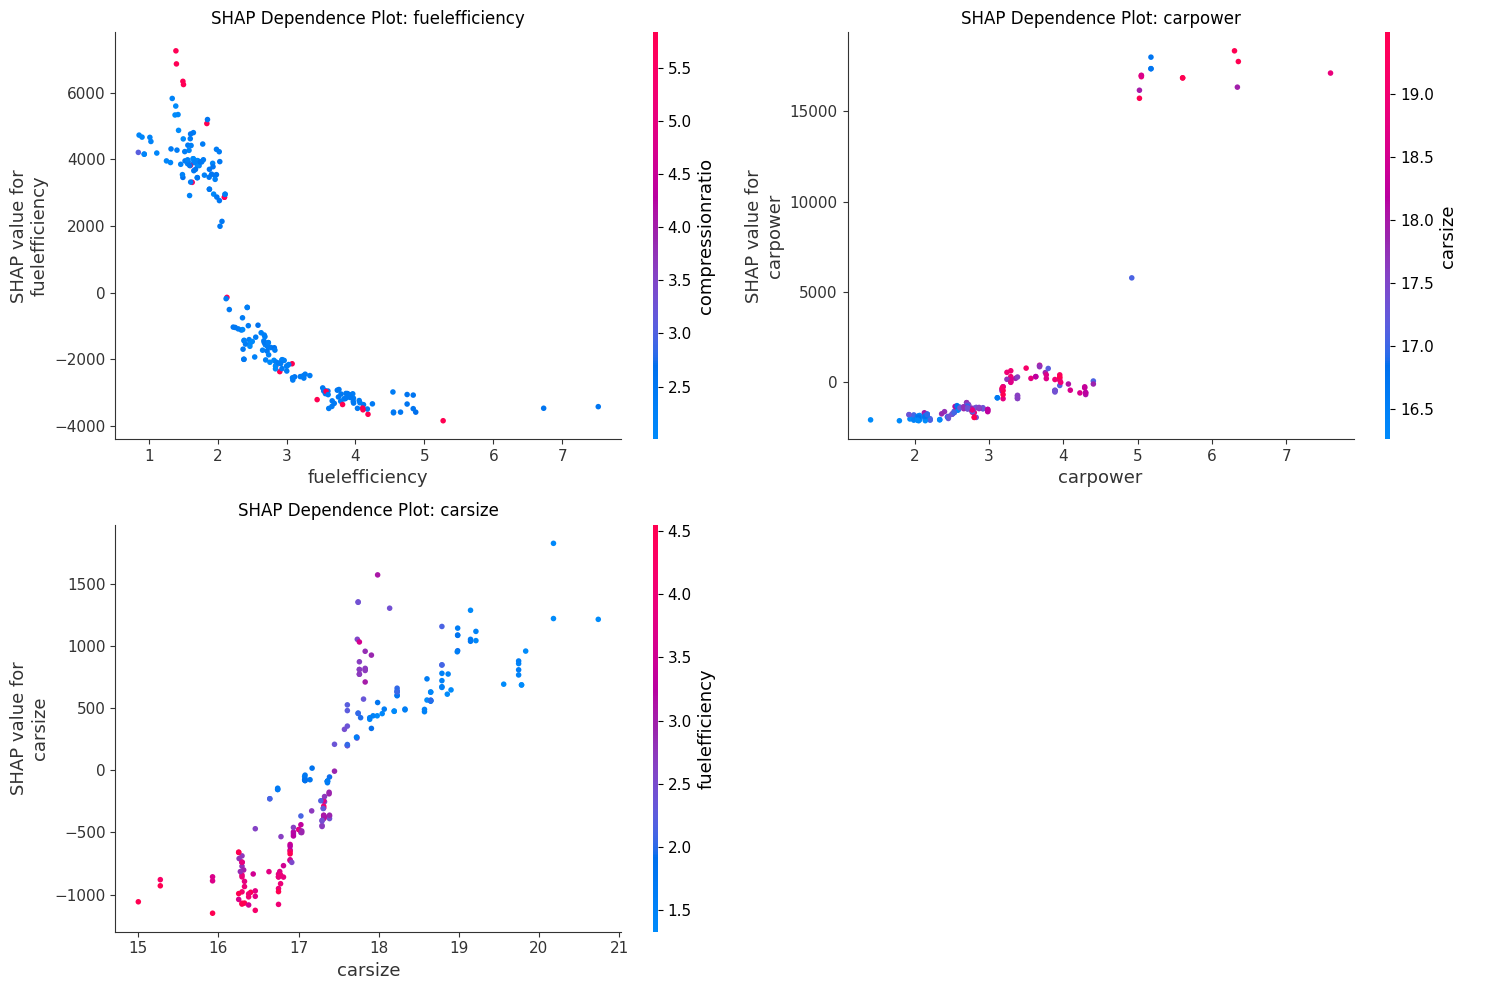

[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END .......................max_depth=9, n_estimators=98; total time=   0.1s
[CV] END ......................max_depth=9, n_estimators=110; total time=   0.1s
[CV] END .....................max_depth=10, n_estimators=102; total time=   0.1s
[CV] END .....................max_depth=10, n_estimators=110; total time=   0.1s
[CV] END .....................max_depth=11, n_estimators=110; total time=   0.1s
[CV] END .....................max_depth=30, n_estimators=100; total time=   0.1s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END .......................max_depth=9, n_estimators=98; total time=   0.1s
[CV] END ......................max_depth=9, n_estimators=102; total time=   0.1s
[CV] END ......................max_depth=9, n_estimators=110; total time=   0.1s
[CV] END ......................max_depth=11, n_estimators=98; total time=   0.1s
[CV] END ...................

[CV] END ....................max_depth=None, n_estimators=98; total time=   0.1s
[CV] END ...................max_depth=None, n_estimators=102; total time=   0.1s
[CV] END ......................max_depth=9, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=98; total time=   0.1s
[CV] END .....................max_depth=10, n_estimators=102; total time=   0.1s
[CV] END .....................max_depth=11, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=30, n_estimators=98; total time=   0.1s
[CV] END .....................max_depth=30, n_estimators=110; total time=   0.1s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=110; total time=   0.1s
[CV] END ......................max_depth=9, n_estimators=110; total time=   0.1s
[CV] END ......................max_depth=9, n_estimators=110; total time=   0.1s
[CV] END ...................

In [166]:

# Initialize SHAP explainer
explainer = shap.Explainer(random_forest_best_model, X_scaled)

# Convert the numpy array back to pandas DataFrame
X_test_scaled_df = pd.DataFrame(X_scaled, columns=column_names)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_scaled)

# Define the features of interest
features_of_interest = ['fuelefficiency', 'carpower', 'carsize']

# Set up a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()  # Flatten to 1D array for easy iteration

# Plot SHAP dependence plots for each feature
for i, feature in enumerate(features_of_interest):
    shap.dependence_plot(feature, shap_values, X_scaled, ax=axs[i], show=False)
    axs[i].set_title(f'SHAP Dependence Plot: {feature}')

# Hide the last subplot (empty)
axs[-1].axis('off')

plt.tight_layout()
plt.show()


From the fuelefficiency dependence plot, in low fuel efficiency region, the SHAP values are positive, which indicates that lower fuel efficiency is pushing car price higher. High compressionratio appears to strengthen this impact. In high fuel efficiency region, the SHAP values are negative, which indicates that higher fuel efficiency is pushing car price lower. Therefore, fuel efficiency has a substantial impact on car price in opposite directions. 

From the carpower dependence plot, in lower carpower region, carpower does not significantly impact car price. In high carpower region, the SHAP values are highly positive. It indicates that high carpower has a strong positive impact on car price. At higher values of carpower, a set of SHAP values associates with some red color points from carsize. It means for some of the highest carpower values, larger carsize have higher car price. Therefore, car of both high carpower and big carsize has high price. 

From the carsize dependence plot, in lower carsize region, the SHAP values are negative, which indicates that smaller carsize is pushing car price lower. In high carsize region, the SHAP values are positive, which indicates that bigger carsize is pushing car price higher. 

Summary

Among all models, RandomForests model has the smallest RMSE of 2276. The associated histogram of residule also indicates that this model performs the best compared to other models. 

The SHAP summary plot indicates that the top features that impact car price include fuel efficiency, car power, and car size. 

Among these features, variance of fuel efficiency leads to the biggest variance of car price. Higher fuel efficiency reduces car price while lower fuel efficiency increases car price. 

The car size feature show a moderate amount of variance, and the spread of SHAP values is less than 'fuel efficiency', which suggests a modest impact on the car price. A bigger car increases car price, which a smaller car reduces car price. 

The car power feature also shows impact on car price. Although a higher car power does not change car price a lot, a lower car power does reduce car price.